In [1]:
dataRaw = '../rawData'
label = ['Good', 'PotentiallyUseful', 'Bad']

from xml.etree import ElementTree as ET
import os
import pickle as pkl

In [2]:
with open('../data/dataset.pkl', 'rb') as fr:
    dataset = pkl.load(fr)

# samples num

In [3]:
dev = dataset['16dev.xml']
for i in range(180, 240):
    print(dev[i])

('Q272_R15_C1', [25, 2435], [76, 207, 1, 19, 290, 11, 6668, 4125, 1, 4, 183, 40, 4817, 1, 19, 191, 11, 8, 2257, 2810, 1, 232, 394, 450, 6, 92, 66, 7266, 88, 25, 2435, 10, 20, 942, 180, 7, 1, 79, 63, 46, 67, 3, 325, 15, 1250, 9, 25, 2435, 1, 48, 200, 11, 16, 2, 4, 74, 106, 333, 67, 25, 2435, 1, 152, 12, 1, 86, 363, 6, 6668, 4125, 7, 7], [14, 14, 5, 14, 155, 11, 575, 1, 42, 21, 114, 1186, 9, 111, 1250, 325, 1], array([[17,  1, 20,  1, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [16,  5, 20, 18, 15, 12,  5, 21, 13,  0,  0,  0,  0,  0,  0,  0]],
      dtype=int32), array([[ 8,  9,  0, ...,  0,  0,  0],
       [ 6, 18,  9, ...,  0,  0,  0],
       [76,  0,  0, ...,  0,  0,  0],
       ...,
       [ 1,  8, 13, ...,  0,  0,  0],
       [23,  1, 19, ...,  0,  0,  0],
       [13, 21,  1, ...,  0,  0,  0]], dtype=int32), array([[95,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [55,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [20, 15,  0,

In [3]:
train15_num = len(dataset['15train.xml'])
dev15_num = len(dataset['15dev.xml'])
test15_num = len(dataset['15test.xml'])

train17_num = len(dataset['16train1.xml'])+len(dataset['16train2.xml'])+ train15_num + dev15_num + test15_num + len(dataset['16dev.xml'])
dev17_num = len(dataset['16test.xml'])
test17_num = len(dataset['17test.xml'])

print('the number of samples in SemEval2015:', train15_num, dev15_num, test15_num)
print('the number of samples in SemEval2017:', train17_num, dev17_num, test17_num)

the number of samples in SemEval2015: 14892 1529 1876
the number of samples in SemEval2017: 38097 3150 2930


# 实例分布

In [20]:
import numpy as np

# 2015
train15_rel = np.asarray([e[-1] for e in dataset['15train.xml']])
dev15_rel = np.asarray([e[-1] for e in dataset['15dev.xml']])
test15_rel = np.asarray([e[-1] for e in dataset['15test.xml']])

In [21]:
# 2017
train16_rel1 = np.asarray([e[-1] for e in dataset['16train1.xml']])
train16_rel2 = np.asarray([e[-1] for e in dataset['16train2.xml']])
dev16_rel = np.asarray([e[-1] for e in dataset['16dev.xml']])
test16_rel = np.asarray([e[-1] for e in dataset['16test.xml']])
test17_rel = np.asarray([e[-1] for e in dataset['17test.xml']])

train17_rel = np.concatenate([train16_rel1, train16_rel2, dev16_rel, train15_rel, dev15_rel, test15_rel], axis=0)
dev17_rel = test16_rel

In [22]:
def count_rel(corpus_rel):
    index = corpus_rel.argmax(axis=1)
    rel_good = (index == 0).astype('int32').sum()
    rel_potential = (index == 1).astype('int32').sum()
    rel_bad = (index == 2).astype('int32').sum()
    return index.shape[0], rel_good, rel_potential, rel_bad

In [25]:
# 2015
print('{0:<8}|{1:<8}|{2:<8}|{3:<8}'.format('all_num', 'good', 'pot', 'bad'))
print('{0:<8}|{1:<8}|{2:<8}|{3:<8}'.format(*count_rel(train15_rel)))
print('{0:<8}|{1:<8}|{2:<8}|{3:<8}'.format(*count_rel(dev15_rel)))
print('{0:<8}|{1:<8}|{2:<8}|{3:<8}'.format(*count_rel(test15_rel)))
print('------')
print('{0:<8}|{1:<8}|{2:<8}|{3:<8}'.format(*count_rel(dev16_rel)))

all_num |good    |pot     |bad     
14892   |7418    |1504    |5970    
1529    |813     |172     |544     
1876    |946     |156     |774     
------
2420    |816     |411     |1193    


In [24]:
# 2017
print('{0:<8}|{1:<8}|{2:<8}|{3:<8}'.format('all_num', 'good', 'pot', 'bad'))
print('{0:<8}|{1:<8}|{2:<8}|{3:<8}'.format(*count_rel(train17_rel)))
print('{0:<8}|{1:<8}|{2:<8}|{3:<8}'.format(*count_rel(dev17_rel)))
print('{0:<8}|{1:<8}|{2:<8}|{3:<8}'.format(*count_rel(test17_rel)))

all_num |good    |pot     |bad     
38097   |16326   |5274    |16497   
3150    |1257    |440     |1453    
2930    |1523    |0       |1407    


# questions number

In [9]:
train15set = set()
dev15set = set()
test15set = set()

train17set = set()
dev17set = set()
test17set = set()

[train15set.add(e[0].split('_')[0]) for e in dataset['15train.xml']]
[dev15set.add(e[0].split('_')[0]) for e in dataset['15dev.xml']]
[test15set.add(e[0].split('_')[0]) for e in dataset['15test.xml']]

[train17set.add('_'.join(e[0].split('_')[0:2])) for e in dataset['16train1.xml']+dataset['16train2.xml']+ dataset['16dev.xml']]
train17set.update(train15set)
train17set.update(dev15set)
train17set.update(test15set)
[dev17set.add('_'.join(e[0].split('_')[0:2])) for e in dataset['16test.xml']]
[test17set.add('_'.join(e[0].split('_')[0:2])) for e in dataset['17test.xml']]

print('the number of questions in SemEval2015:', len(train15set), len(dev15set), len(test15set))
print('the number of questions in SemEval2017:', len(train17set), len(dev17set), len(test17set))


the number of questions in SemEval2015: 2479 290 319
the number of questions in SemEval2017: 5068 315 293


# sentence length

In [10]:
train15_qa_length = [[len(e[1]), len(e[2]), len(e[3])] for e in dataset['15train.xml']]
dev15_qa_length = [[len(e[1]), len(e[2]), len(e[3])] for e in dataset['15dev.xml']]
test15_qa_length = [[len(e[1]), len(e[2]), len(e[3])] for e in dataset['15test.xml']]

train17_qa_length = [[len(e[1]), len(e[2]), len(e[3])] for e in dataset['16train1.xml']+dataset['16train2.xml']+ dataset['16dev.xml']]
train17_qa_length += train15_qa_length + dev15_qa_length + test15_qa_length
dev17_qa_length = [[len(e[1]), len(e[2]), len(e[3])] for e in dataset['16test.xml']]
test17_qa_length = [[len(e[1]), len(e[2]), len(e[3])] for e in dataset['17test.xml']]

In [11]:
train15_qa_length = [a for a in zip(*train15_qa_length)]
dev15_qa_length = [a for a in zip(*dev15_qa_length)]
test15_qa_length = [a for a in zip(*test15_qa_length)]

train17_qa_length = [a for a in zip(*train17_qa_length)]
dev17_qa_length = [a for a in zip(*dev17_qa_length)]
test17_qa_length = [a for a in zip(*test17_qa_length)]

In [12]:
length15 = [train15_qa_length, dev15_qa_length, test15_qa_length]
length17 = [train17_qa_length, dev17_qa_length, test17_qa_length]

print('max length of subject in 15:', [max(length15[i][0]) for i in range(3)])
print('max length of body in 15:', [max(length15[i][1]) for i in range(3)])
print('max length of answer in 15:', [max(length15[i][2]) for i in range(3)])

print('max length of subject in 17:', [max(length17[i][0]) for i in range(3)])
print('max length of body in 17:', [max(length17[i][1]) for i in range(3)])
print('max length of answer in 17:', [max(length17[i][2]) for i in range(3)])

max length of subject in 15: [27, 23, 27]
max length of body in 15: [108, 104, 105]
max length of answer in 15: [1580, 1350, 678]
max length of subject in 17: [27, 22, 22]
max length of body in 17: [122, 113, 124]
max length of answer in 17: [1580, 238, 417]


In [13]:
print('min length of subject in 15:', [min(length15[i][0]) for i in range(3)])
print('min length of body in 15:', [min(length15[i][1]) for i in range(3)])
print('min length of answer in 15:', [min(length15[i][2]) for i in range(3)])

print('min length of subject in 17:', [min(length17[i][0]) for i in range(3)])
print('min length of body in 17:', [min(length17[i][1]) for i in range(3)])
print('min length of answer in 17:', [min(length17[i][2]) for i in range(3)])

min length of subject in 15: [1, 1, 1]
min length of body in 15: [1, 4, 1]
min length of answer in 15: [1, 1, 1]
min length of subject in 17: [1, 1, 1]
min length of body in 17: [1, 4, 4]
min length of answer in 17: [1, 1, 1]


In [14]:
print('average length of subject in 15:', [sum(length15[i][0])/len(length15[i][0]) for i in range(3)])
print('average length of body in 15:', [sum(length15[i][1])/len(length15[i][1]) for i in range(3)])
print('average length of answer in 15:', [sum(length15[i][2])/len(length15[i][2]) for i in range(3)])

print('average length of subject in 17:', [sum(length17[i][0])/len(length17[i][0]) for i in range(3)])
print('average length of body in 17:', [sum(length17[i][1])/len(length17[i][1]) for i in range(3)])
print('average length of answer in 17:', [sum(length17[i][2])/len(length17[i][2]) for i in range(3)])

average length of subject in 15: [6.166532366371206, 5.652714192282538, 5.954157782515991]
average length of body in 15: [39.920829975825946, 40.42315238718116, 38.95575692963752]
average length of answer in 15: [34.745366639806605, 34.12230215827338, 35.15565031982943]
average length of subject in 17: [6.158358925899677, 5.866666666666666, 5.8668941979522184]
average length of body in 17: [45.85817780927632, 49.73015873015873, 54.689419795221845]
average length of answer in 17: [37.914140221014776, 38.25492063492064, 40.26006825938567]


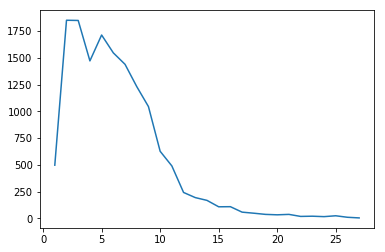

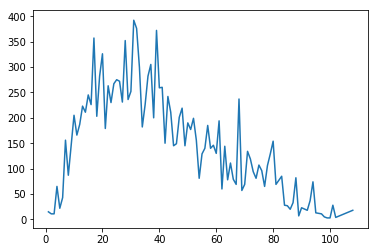

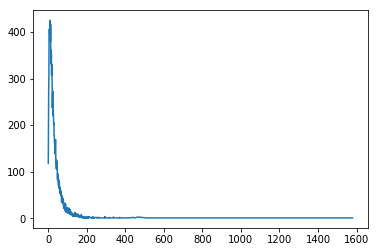

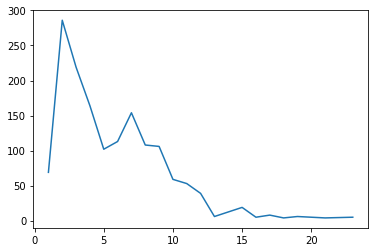

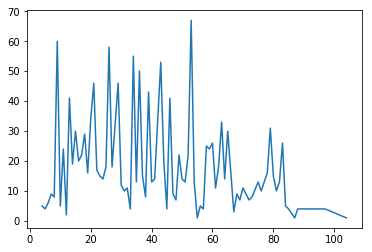

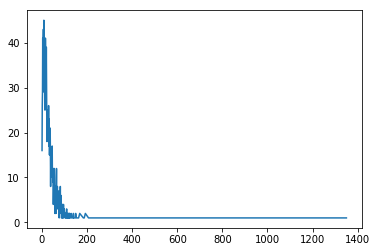

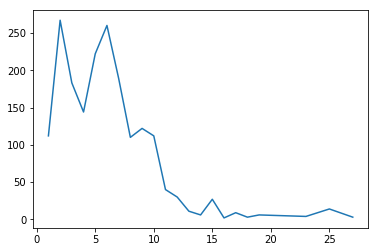

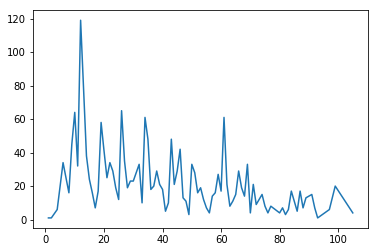

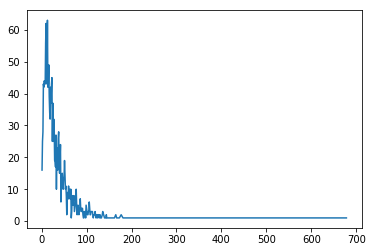

In [15]:
%matplotlib inline

from collections import Counter
import matplotlib.pyplot as plt

count15 = [[sorted(Counter(b).items(), key=lambda x:x[0]) for b in a] for a in length15] 
count17 = [[sorted(Counter(b).items(), key=lambda x:x[0]) for b in a] for a in length17]
num = 1
for data in count15:
    for sentence in data:
        plt.figure(num)
        plt.plot(*zip(*sentence))
        plt.show()
        


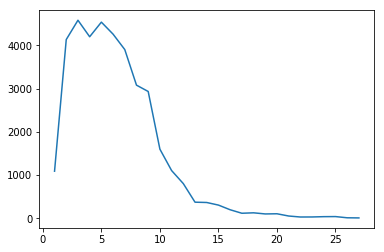

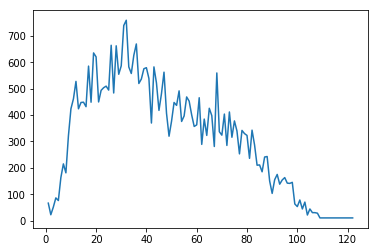

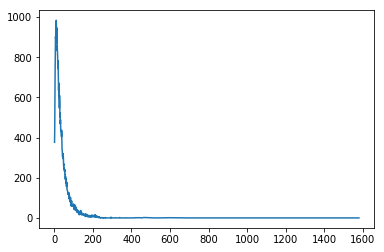

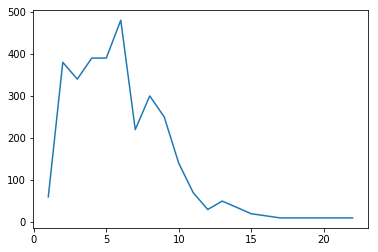

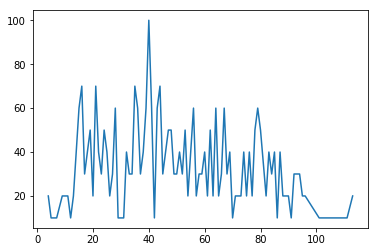

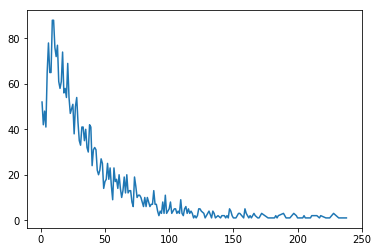

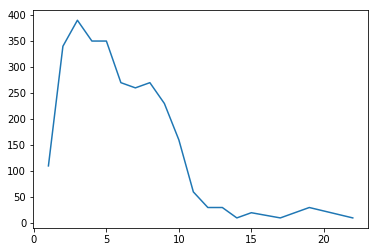

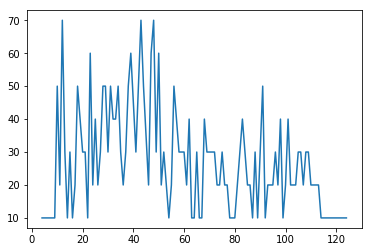

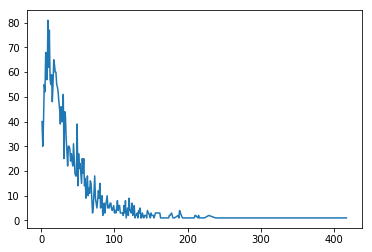

In [16]:
for data in count17:
    for sentence in data:
        plt.figure()
        plt.plot(*zip(*sentence))
        plt.show()

In [17]:
def search(sentence):
    all_num = 0
    for item in sentence:
        all_num += item[1]
    print(all_num)
    cur_num = 0
    least_num = 0.9*all_num
    start_rate = 0.9
    for item in sentence:
        cur_num += item[1]
        if cur_num > least_num:
            print('current rate: {}, current length: {}, num: {}, cur_num: {}'.format(cur_num / all_num, item[0], item[1], cur_num))
            start_rate += 0.01
            least_num = start_rate * all_num
    
    print('\n\n')
        

        

In [18]:
for data in count15:
    for sentence in data:
        search(sentence)

14892
current rate: 0.924388933655654, current length: 11, num: 490, cur_num: 13766
current rate: 0.9406392694063926, current length: 12, num: 242, cur_num: 14008
current rate: 0.9536663980660758, current length: 13, num: 194, cur_num: 14202
current rate: 0.9649476228847703, current length: 14, num: 168, cur_num: 14370
current rate: 0.9721998388396454, current length: 15, num: 108, cur_num: 14478
current rate: 0.9795192049422509, current length: 16, num: 109, cur_num: 14587
current rate: 0.9834139135106097, current length: 17, num: 58, cur_num: 14645
current rate: 0.9866371206016653, current length: 18, num: 48, cur_num: 14693
current rate: 0.9891216760676873, current length: 19, num: 37, cur_num: 14730
current rate: 0.991337630942788, current length: 20, num: 33, cur_num: 14763



14892
current rate: 0.9049825409615901, current length: 73, num: 94, cur_num: 13477
current rate: 0.9104217029277465, current length: 74, num: 81, cur_num: 13558
current rate: 0.9240531829170024, current len

In [19]:
for data in count17:
    for sentence in data:
        search(sentence)

38097
current rate: 0.9007795889440113, current length: 10, num: 1598, cur_num: 34317
current rate: 0.9297319998950049, current length: 11, num: 1103, cur_num: 35420
current rate: 0.9507572774759168, current length: 12, num: 801, cur_num: 36221
current rate: 0.9604955770795601, current length: 13, num: 371, cur_num: 36592
current rate: 0.9700501351812478, current length: 14, num: 364, cur_num: 36956
current rate: 0.9780297661233168, current length: 15, num: 304, cur_num: 37260
current rate: 0.9831745281780717, current length: 16, num: 196, cur_num: 37456
current rate: 0.9861931385673413, current length: 17, num: 115, cur_num: 37571
current rate: 0.9894742368165472, current length: 18, num: 125, cur_num: 37696
current rate: 0.9920728666299183, current length: 19, num: 99, cur_num: 37795



38097
current rate: 0.9024332624616112, current length: 81, num: 236, cur_num: 34380
current rate: 0.9114365960574323, current length: 82, num: 343, cur_num: 34723
current rate: 0.9244822426962753, cu